In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
#from nltk.tokenize import word_token

In [3]:
os.listdir("Seattle_Airbnb")

['calendar.csv', 'listings.csv', 'reviews.csv']

In [4]:
calendar_df = pd.read_csv('Seattle_Airbnb\\calendar.csv')
listings_df = pd.read_csv('Seattle_Airbnb\\listings.csv')
reviews_df = pd.read_csv('Seattle_Airbnb\\reviews.csv')

In [5]:
calendar_df['date'] = pd.to_datetime(calendar_df['date'])
listings_df['last_scraped'] = pd.to_datetime(listings_df['last_scraped'])
reviews_df['date'] = pd.to_datetime(reviews_df['date'])
listings_df['host_since'] = pd.to_datetime(listings_df['host_since'])

In [209]:
listings_df['property_type'].value_counts().index

Index(['House', 'Apartment', 'Townhouse', 'Condominium', 'Loft',
       'Bed & Breakfast', 'Other', 'Cabin', 'Camper/RV', 'Bungalow', 'Boat',
       'Tent', 'Treehouse', 'Dorm', 'Chalet', 'Yurt'],
      dtype='object', name='property_type')

In [6]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3818 non-null   int64         
 1   listing_url                       3818 non-null   object        
 2   scrape_id                         3818 non-null   int64         
 3   last_scraped                      3818 non-null   datetime64[ns]
 4   name                              3818 non-null   object        
 5   summary                           3641 non-null   object        
 6   space                             3249 non-null   object        
 7   description                       3818 non-null   object        
 8   experiences_offered               3818 non-null   object        
 9   neighborhood_overview             2786 non-null   object        
 10  notes                             2212 non-null 

In [7]:
listings_df[listings_df['id'] == 7202016]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3226,7202016,https://www.airbnb.com/rooms/7202016,20160104002432,2016-01-04,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,"Mid century condo, super airy and spacious. H...",Cute mid century condo within walking distance...,none,"Neighborhood has everything. Coffee, restaura...",...,10.0,f,NaN,WASHINGTON,t,flexible,f,f,1,2.82


In [8]:
listings_df.isnull().sum()[listings_df.isnull().sum()!=0]

summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_verifications                2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                     1
bathrooms                   

In [9]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [10]:
listings_df.calendar_updated.value_counts()

calendar_updated
today            706
2 weeks ago      347
3 weeks ago      300
2 months ago     281
a week ago       248
yesterday        231
3 months ago     218
4 weeks ago      213
3 days ago       162
5 weeks ago      156
4 days ago       145
4 months ago     133
5 days ago       132
6 weeks ago      118
2 days ago        96
5 months ago      91
7 weeks ago       63
6 months ago      29
6 days ago        28
1 week ago        26
never             24
7 months ago      23
8 months ago      14
10 months ago      8
9 months ago       7
11 months ago      5
12 months ago      5
22 months ago      2
13 months ago      2
30 months ago      1
14 months ago      1
16 months ago      1
15 months ago      1
17 months ago      1
Name: count, dtype: int64

In [11]:

listings_df.drop(['market','first_review','host_has_profile_pic','neighbourhood_cleansed', 'host_identity_verified','host_acceptance_rate', 'host_is_superhost','smart_location','calendar_updated', 'state','country_code', 'country', 'country','is_location_exact','jurisdiction_names',
       'host_thumbnail_url', 'host_picture_url','neighborhood_overview','host_location','street','host_url', 'host_name','notes', 'transit', 'thumbnail_url','zipcode', 'medium_url', 'picture_url','requires_license','calendar_last_scraped','last_scraped','scrape_id',
       'xl_picture_url','experiences_offered','space', 'description','summary','name','listing_url','host_about','square_feet','weekly_price','monthly_price','license','reviews_per_month','transit'], axis=1).columns

Index(['id', 'host_id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'neighbourhood',
       'neighbourhood_group_cleansed', 'city', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verifica

In [12]:
listings_df['availability_365']

0       346
1       291
2       220
3       143
4       365
       ... 
3813     32
3814    273
3815     88
3816    179
3817      7
Name: availability_365, Length: 3818, dtype: int64

In [13]:

reviews_df.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [14]:
calendar_df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [15]:
merge_lising_calender = listings_df[['id','price','weekly_price','monthly_price']].rename(columns={'price':'price_listing','id':'listing_id'}).merge(calendar_df,how='inner')

In [16]:
def convert_to_price(df):
    print(df)
    return float(df[1:].replace('','.'))

In [17]:
merge_lising_calender[merge_lising_calender['available']=='t']['price'].value_counts()

price
$150.00    36646
$100.00    31755
$75.00     29820
$125.00    27538
$65.00     26415
           ...  
$751.00        1
$759.00        1
$12.00         1
$685.00        1
$554.00        1
Name: count, Length: 669, dtype: int64

In [18]:
calendar_df[calendar_df['available']=='f'].groupby([(calendar_df['date'].dt.month)]).count()

,listing_id,date,available,price
date,,,,
1,49603,49603,49603,0
2,37401,37401,37401,0
3,34420,34420,34420,0
4,38503,38503,38503,0
5,38387,38387,38387,0
6,37296,37296,37296,0
7,44136,44136,44136,0
8,42011,42011,42011,0
9,37294,37294,37294,0


In [19]:
# new column that return 1 if the hoster in the same city
'Seattle' in listings_df.host_location[3813]
# the higher number of the list the heigher price it gets
listings_df.amenities[0].split(',')

['{TV',
 '"Cable TV"',
 'Internet',
 '"Wireless Internet"',
 '"Air Conditioning"',
 'Kitchen',
 'Heating',
 '"Family/Kid Friendly"',
 'Washer',
 'Dryer}']

In [22]:
# Sentiment Analysis on all the reviews I will run it latlly because it will take a lot of time 

from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer
analyzer = pipeline("sentiment-analysis")
BERT_dic = {'POSITIVE':1,'NEGATIVE':0}
def review_rate(df):
    prid = analyzer(df['comments'])[0]
    score = BERT_dic[prid['label']]
    if score == 1:
        pos = prid['score']*100
        
    elif score == 0:
        pos = (1 - prid['score'])*100
    return pos
reviews_df[:10].apply(review_rate,axis=1)

In [ ]:
# Data questions

# 1- What are the busiest times of the year to visit Boston? By how much do prices spike?
# 2- Heighest host_id that have most owning property
# 3- Where is the distribution of the highest property cost in the map


# What are the busiest times of the year to visit Boston? By how much do prices spike?

In [6]:
merge_lising_calender = listings_df[['id','price','weekly_price','monthly_price']].rename(columns={'price':'price_listing','id':'listing_id'}).merge(calendar_df,how='inner')

In [7]:
merge_lising_calender['price_listing'] = merge_lising_calender['price_listing'].apply(lambda x:float(x[1:].replace(',','')))
merge_lising_calender['price'] = merge_lising_calender['price'].apply(lambda x:float(x[1:].replace(',','')) if isinstance(x,str) else x)

In [8]:
merge_lising_calender[merge_lising_calender['available']=='t'][merge_lising_calender['price_listing']>merge_lising_calender['price']]

C:\Users\user\AppData\Local\Temp\ipykernel_16548\1674619139.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merge_lising_calender[merge_lising_calender['available']=='t'][merge_lising_calender['price_listing']>merge_lising_calender['price']]


,listing_id,price_listing,weekly_price,monthly_price,date,available,price
365,953595,150.0,"$1,000.00","$3,000.00",2016-01-04,t,125.0
366,953595,150.0,"$1,000.00","$3,000.00",2016-01-05,t,125.0
370,953595,150.0,"$1,000.00","$3,000.00",2016-01-09,t,125.0
371,953595,150.0,"$1,000.00","$3,000.00",2016-01-10,t,125.0
372,953595,150.0,"$1,000.00","$3,000.00",2016-01-11,t,125.0
...,...,...,...,...,...,...,...
1392549,10267360,93.0,$450.00,NaN,2016-03-18,t,75.0
1392550,10267360,93.0,$450.00,NaN,2016-03-19,t,75.0
1392556,10267360,93.0,$450.00,NaN,2016-03-25,t,75.0
1392557,10267360,93.0,$450.00,NaN,2016-03-26,t,75.0


In [11]:
merge_lising_calender['PercChange'] = merge_lising_calender.apply(lambda x : ((x['price'] - x['price_listing'] )/x['price_listing'])*100,axis=1).round(2)

In [12]:
Q1 = merge_lising_calender[merge_lising_calender['available']=='t'].groupby([merge_lising_calender.date.dt.month]).mean().round(2)

In [13]:
merge_lising_calender[merge_lising_calender['available']=='t']['PercChange'].groupby([merge_lising_calender.date.dt.month]).mean().round(2)

date
1     -1.28
2      0.55
3      4.08
4      6.97
5     10.00
6     15.73
7     17.77
8     16.52
9     11.16
10     6.46
11     5.34
12     6.61
Name: PercChange, dtype: float64

In [277]:
Q1.values

array([-1.28,  0.55,  4.08,  6.97, 10.  , 15.73, 17.77, 16.52, 11.16,
        6.46,  5.34,  6.61])

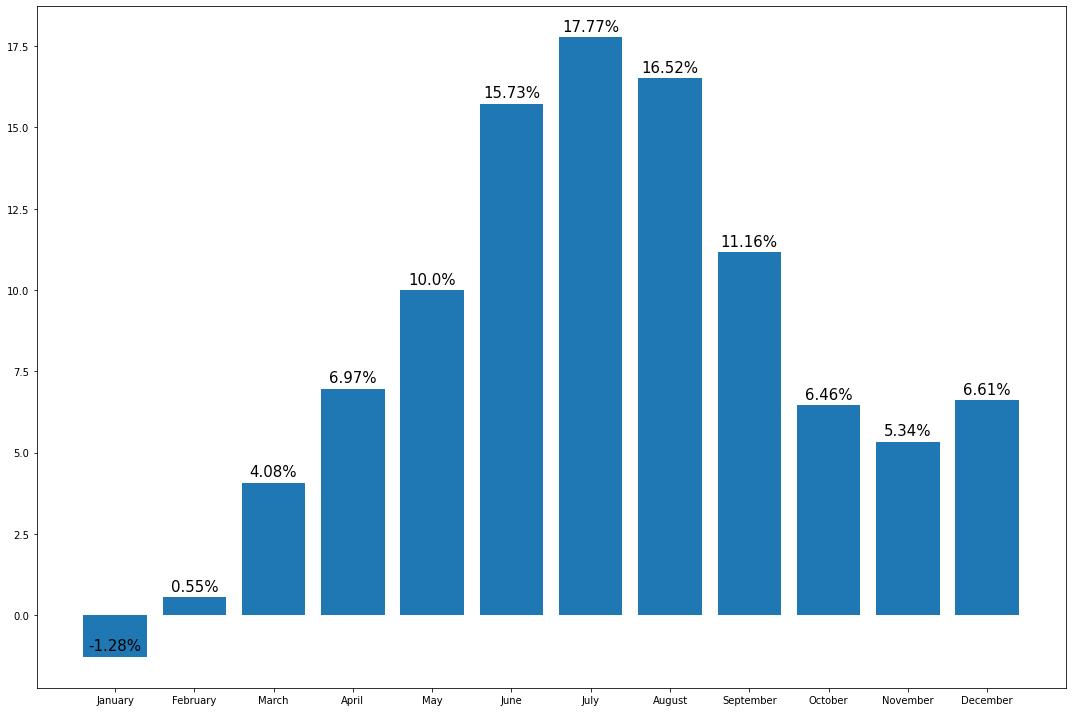

In [14]:
import numpy as np
from matplotlib import pyplot as plt
Q1 = merge_lising_calender[merge_lising_calender['available']=='t']['PercChange'].groupby([merge_lising_calender.date.dt.month]).mean().round(2)
plt.rcParams["figure.figsize"] = [15.00, 10]
plt.rcParams["figure.autolayout"] = True

frequencies = Q1.values
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure()

p1 = plt.bar(month, frequencies)

for rect1 in p1:
    height = rect1.get_height()
    plt.annotate( "{}%".format(height),(rect1.get_x() + rect1.get_width()/2, height+.1),ha="center",va="bottom",fontsize=15)

plt.show()

#  Where is the distribution of the highest property cost in the map


In [15]:
listings_df['price'] = listings_df['price'].apply(lambda x:float(x[1:].replace(',','')) if isinstance(x,str) else x)

In [16]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

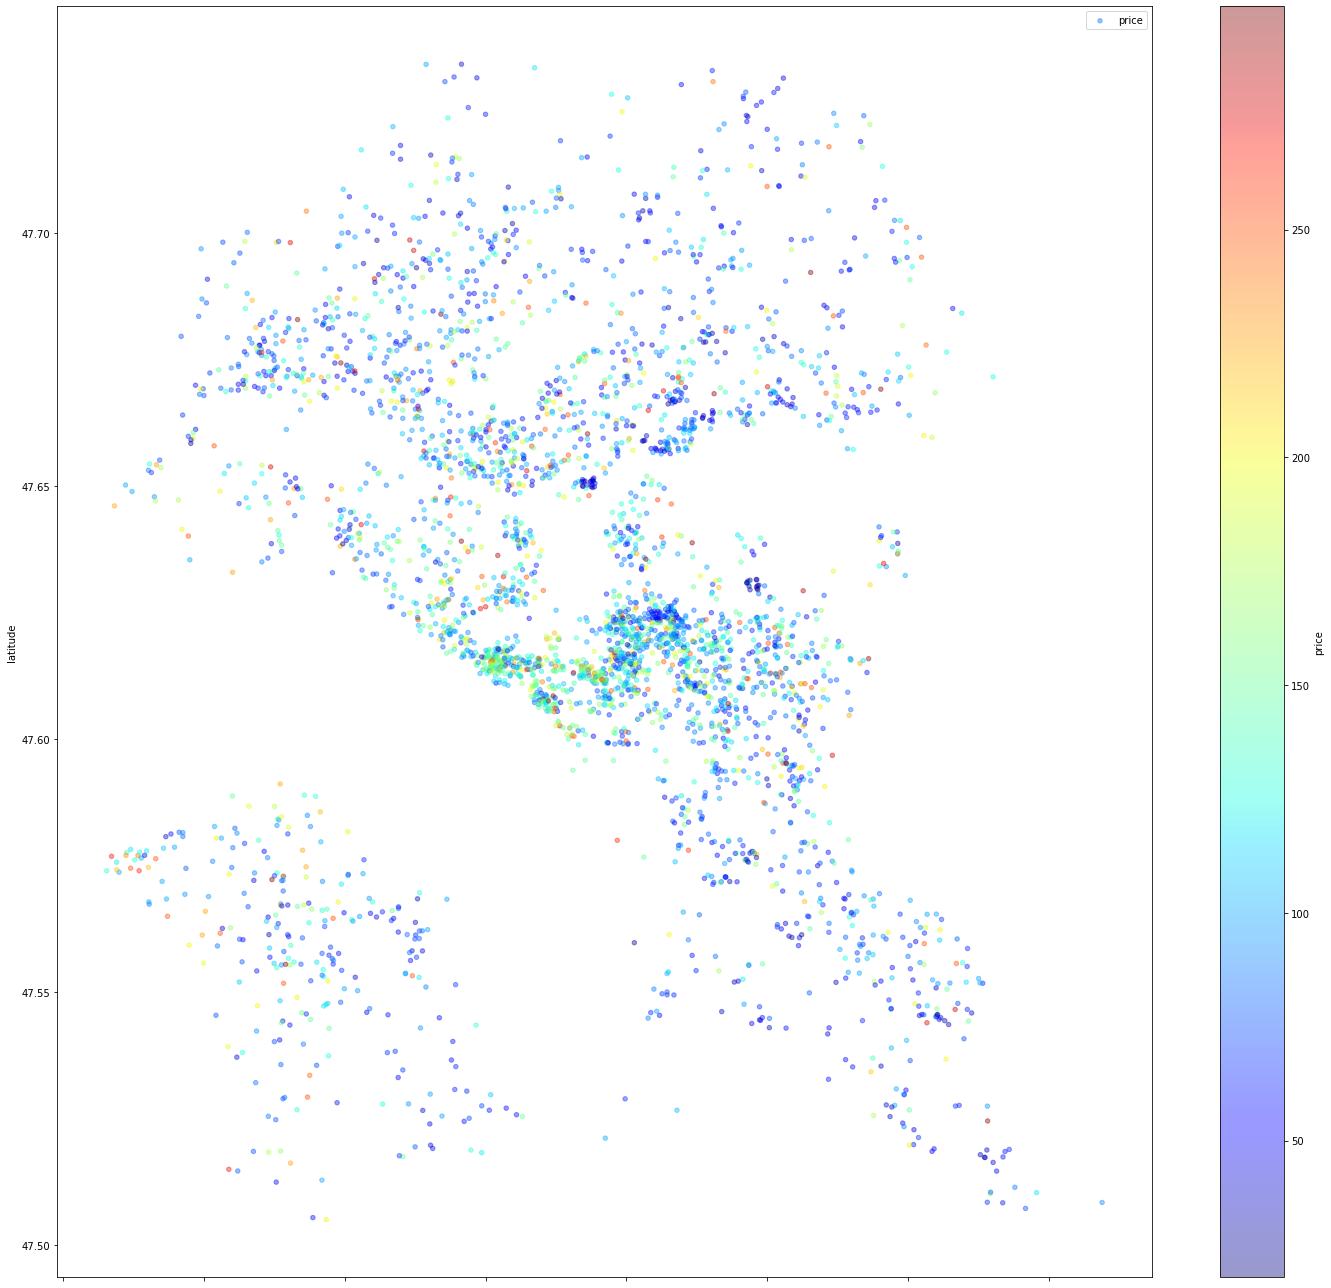

In [20]:
listings_df[listings_df['price']<300].plot(kind='scatter', x='longitude', y='latitude', c='price',
                   label='price',cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(20,18))

In [41]:
listings_df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


# Word cloud of each review 

In [77]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Load the dataset
df = reviews_df

# Convert all text to lowercase
df['review'] = df['comments'].str.lower()

# Remove punctuation marks
df['review'] = df['review'].str.replace('[{}]'.format(string.punctuation), '')
df['review'] = df['review'].astype(str)
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['review'] = df['review'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Stem the words
stemmer = PorterStemmer()
df['review'] = df['review'].apply(lambda x: ' '.join(stemmer.stem(word) for word in x.split()))

# Create a word cloud
from wordcloud import WordCloud

text = ' '.join(df['review'].tolist())
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Price Prediction


In [21]:
import numpy as np 
import seaborn as sns
import ast

%matplotlib inline

In [22]:
listings_df['price'] = listings_df['price'].apply(lambda x:float(x[1:].replace(',','')) if isinstance(x,str) else x)
listings_df['security_deposit'] = listings_df['security_deposit'].apply(lambda x:float(x[1:].replace(',','')) if isinstance(x,str) else x)
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].apply(lambda x:float(x[1:].replace(',','')) if isinstance(x,str) else x)
listings_df['number_of_verifications'] = listings_df['host_verifications'].apply(lambda x: (len(ast.literal_eval(x)) if isinstance(x,str) else x))
listings_df['number_amenities'] = listings_df['amenities'].apply(lambda x: (len(x.split(',')) if isinstance(x,str) else x))
listings_df['host_response_rate'] = listings_df['host_response_rate'].apply(lambda x:float(x.replace('%',''))/100 if isinstance(x,str) else x)
listings_df['extra_people'] = listings_df['extra_people'].apply(lambda x:float(x[1:].replace(',',''))/100 if isinstance(x,str) else x)
listings_df['instant_bookable'] = listings_df['instant_bookable'].apply(lambda x: 1 if x=='t' else 0)
policy_map = {'strict': 0, 'moderate': 1, 'flexible': 2}
listings_df['cancellation_policy'] = listings_df['cancellation_policy'].apply(lambda x:policy_map[x])
listings_df['require_guest_profile_picture'] = listings_df['require_guest_profile_picture'].apply(lambda x: 1 if x=='t' else 0)
host_response_time_map = {'within an hour': 0, 'within a few hours': 1, 'within a day': 2,'a few days or more':3}
listings_df["host_response_time"] = listings_df["host_response_time"].apply(lambda x:host_response_time_map[x] if x==x else x)
neighbourhood_onehot = pd.get_dummies(listings_df.neighbourhood_group_cleansed, prefix='neighbourhood',dtype=int)
listings_df[neighbourhood_onehot.columns] = neighbourhood_onehot
listings_df['bed_type'].value_counts()
bed_type_onehot = pd.get_dummies(listings_df['bed_type'], prefix='bedType',dtype=int)
listings_df[bed_type_onehot.columns] = bed_type_onehot

import re
stop_words = set(stopwords.words('english'))
def PreProccess_amenities(df):
    list_words = []
    new_df = re.sub('[/"}{,]'," ",df).split()

    for n in new_df:
        if n not in stop_words:
            list_words.append(n)
    return list_words
listings_df['amenities'].apply(PreProccess_amenities)



from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
encoded = mlb.fit_transform(listings_df['amenities'].apply(PreProccess_amenities))
one_hot_df = pd.DataFrame(encoded, columns=mlb.classes_)
listings_df[one_hot_df.columns] = one_hot_df


property_type_map = {'House':0, 'Apartment':1, 'Townhouse':2, 'Condominium':3, 'Loft':4,
       'Bed & Breakfast':5, 'Other':6, 'Cabin':7, 'Camper/RV':8, 'Bungalow':9, 'Boat':10,
       'Tent':11, 'Treehouse':12, 'Dorm':13, 'Chalet':14, 'Yurt':15}
listings_df['property_type'] = listings_df['property_type'].apply(lambda x:property_type_map[x] if x==x else x)

room_type_map = {'Entire home/apt':0, 'Private room':1, 'Shared room':2}
listings_df['room_type'] = listings_df['room_type'].apply(lambda x:room_type_map[x] if x==x else x)


TypeError: object of type 'NoneType' has no len()

In [23]:

listings_df = listings_df.drop(['review_scores_accuracy','host_response_time', 'host_response_rate','review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','host_response_time', 'host_response_rate','host_verifications','neighbourhood_group_cleansed','bed_type','host_neighbourhood','amenities','require_guest_profile_picture','require_guest_phone_verification','last_review','neighbourhood','has_availability','city'
,'id', 'host_id','host_since','market','first_review','host_has_profile_pic','neighbourhood_cleansed', 'host_identity_verified','host_acceptance_rate','availability_30',
       'availability_60', 'availability_90', 'host_is_superhost','smart_location','calendar_updated', 'state','country_code', 'country', 'country','is_location_exact','jurisdiction_names',
       'host_thumbnail_url', 'host_picture_url','neighborhood_overview','host_location','street','host_url', 'host_name','notes', 'transit', 'thumbnail_url','zipcode', 'medium_url', 'picture_url','requires_license','calendar_last_scraped','last_scraped','scrape_id',
       'xl_picture_url','experiences_offered','space', 'description','summary','name','listing_url','host_about','square_feet','weekly_price','monthly_price','license','reviews_per_month','transit'], axis=1)

In [24]:



print(listings_df.isnull().sum().to_markdown())


|                                |    0 |
|:-------------------------------|-----:|
| host_listings_count            |    2 |
| host_total_listings_count      |    2 |
| latitude                       |    0 |
| longitude                      |    0 |
| property_type                  |    1 |
| room_type                      |    0 |
| accommodates                   |    0 |
| bathrooms                      |   16 |
| bedrooms                       |    6 |
| beds                           |    1 |
| price                          |    0 |
| security_deposit               | 1952 |
| cleaning_fee                   | 1030 |
| guests_included                |    0 |
| extra_people                   |    0 |
| minimum_nights                 |    0 |
| maximum_nights                 |    0 |
| availability_365               |    0 |
| number_of_reviews              |    0 |
| review_scores_rating           |  647 |
| review_scores_cleanliness      |  653 |
| instant_bookable               |

In [225]:

# impute the null values
listings_df['security_deposit'] = listings_df['security_deposit'].fillna(listings_df['security_deposit'].median())
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].fillna(listings_df['cleaning_fee'].median())
listings_df['review_scores_rating'] = listings_df['review_scores_rating'].fillna(listings_df['review_scores_rating'].median())
listings_df['review_scores_cleanliness'] = listings_df['review_scores_cleanliness'].fillna(listings_df['review_scores_cleanliness'].median())

# drop the rest nan rows
listings_df = listings_df.dropna()

In [226]:
listings_df



,host_listings_count,host_total_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,Suitable,TV,Tub,Washer,Wheelchair,Wireless,Workspace,live,pet(s),property
0,3.0,3.0,47.636289,-122.371025,1.0,0,4,1.0,1.0,1.0,...,0,1,0,1,0,1,0,0,0,0
1,6.0,6.0,47.639123,-122.365666,1.0,0,4,1.0,1.0,1.0,...,0,1,0,1,0,1,0,0,0,0
2,2.0,2.0,47.629724,-122.369483,0.0,0,11,4.5,5.0,7.0,...,0,1,1,1,0,1,0,1,0,1
3,1.0,1.0,47.638473,-122.369279,1.0,0,3,1.0,0.0,2.0,...,0,0,0,1,0,1,0,0,0,0
4,2.0,2.0,47.632918,-122.372471,0.0,0,6,2.0,3.0,3.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,354.0,354.0,47.664295,-122.359170,0.0,0,6,2.0,3.0,3.0,...,0,1,0,1,1,1,0,0,0,0
3814,1.0,1.0,47.649552,-122.318309,1.0,0,4,1.0,1.0,2.0,...,0,1,0,0,0,1,1,0,0,0
3815,1.0,1.0,47.508453,-122.240607,0.0,0,2,1.0,1.0,1.0,...,0,1,0,1,0,1,1,1,0,1
3816,1.0,1.0,47.632335,-122.275530,3.0,0,2,1.0,0.0,1.0,...,0,1,0,0,0,1,1,0,0,0


<Axes: >

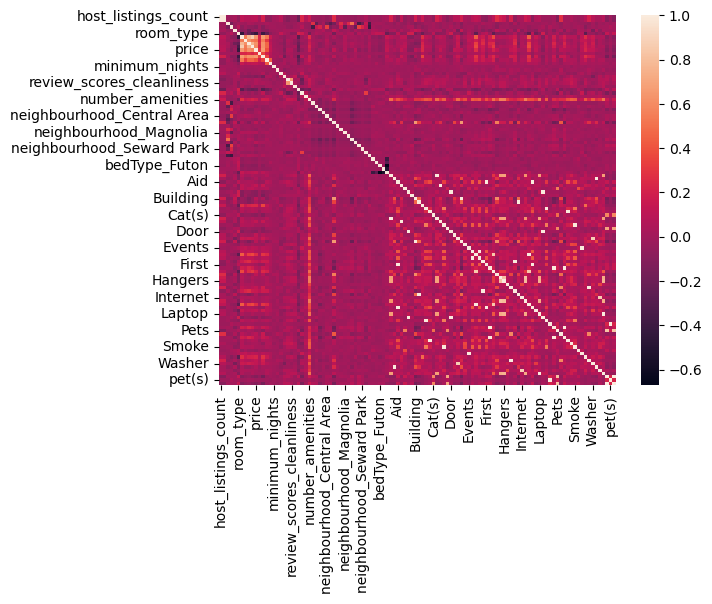

In [202]:
sns.heatmap(listings_df[listings_df.describe().columns].corr())


In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [237]:
#Split into explanatory and response variables
X = listings_df.drop('price', axis=1)
y = listings_df['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
print('train score:',train_score)
print('test score:',test_score)

In [238]:
test_score

0.5772293944336329

In [239]:
train_score

0.619475903098694